In [7]:
%matplotlib inline

from matplotlib import rc
rc("font", family="serif", size=15)
rc("text", usetex=True)
rc("./weaklensing.tex")

import numpy
import matplotlib.pyplot as plt
import daft

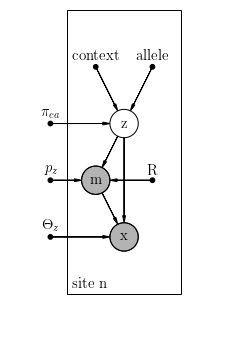

In [8]:
xo = 2
yo = 2
xpos = 4
ypos = 4
nrow = 4
ncol = 6
pgm = daft.PGM((nrow,ncol), origin = (xo, yo))

# add random variables
pgm.add_node(daft.Node('context', 'context', xpos-0.5, ypos+3, fixed=True))
pgm.add_node(daft.Node('allele', 'allele', xpos+0.5, ypos+3, fixed=True))
pgm.add_node(daft.Node('z', 'z', xpos, ypos+2))
pgm.add_node(daft.Node('m', 'm', xpos - 0.5, ypos+1, observed=True))
pgm.add_node(daft.Node('x', 'x', xpos, ypos, observed=True))

# add parameters
pgm.add_node(daft.Node('pi', '$\pi_{ca}$', xpos-1.3, ypos+2, fixed=True))
pgm.add_node(daft.Node('p', '$p_z$', xpos-1.3, ypos+1, fixed=True))
pgm.add_node(daft.Node('theta', "$\Theta_z$", xpos-1.3, ypos, fixed=True)) # $\theta doesn't$ work for some reason 
pgm.add_node(daft.Node('R', 'R', xpos+0.5, ypos+1, fixed=True))

# add edges
pgm.add_edge('context','z')
pgm.add_edge('allele','z')
pgm.add_edge('z','m')
pgm.add_edge('m','x')
pgm.add_edge('z', 'x')

pgm.add_edge('pi', 'z')
pgm.add_edge('p', 'm')
pgm.add_edge('theta', 'x')
pgm.add_edge('R', 'm')

plate_width = 2
plate_height = 5
pgm.add_plate(daft.Plate((xpos-1, ypos-1, plate_width, plate_height), label='site n'))

pgm.render()
pgm.figure.savefig("pgm.png")